In [1]:
import warnings
warnings.filterwarnings('ignore')

# Price Data Acquisition

In [2]:
import pandas as pd

In [3]:
import os
os.environ['http_proxy'] = "http://127.0.0.1:7897"
os.environ['https_proxy'] = "http://127.0.0.1:7897"
os.environ['HTTP_PROXY'] = "http://127.0.0.1:7897"
os.environ['HTTPS_PROXY'] = "http://127.0.0.1:7897"

In [4]:
import yfinance as yf

start_date = '2022-03-07'
end_date = '2023-03-06'

BTC_Ticker = yf.Ticker("BTC-USD")
try:
    BTC_Data = BTC_Ticker.history(start=start_date, end=end_date)
except:
    BTC_Data = None

In [5]:
BTC_Data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-07 00:00:00+00:00,38429.304688,39430.226562,37260.203125,38062.039062,28546143503,0.0,0.0
2022-03-08 00:00:00+00:00,38059.902344,39304.441406,37957.386719,38737.269531,25776583476,0.0,0.0
2022-03-09 00:00:00+00:00,38742.816406,42465.671875,38706.093750,41982.925781,32284121034,0.0,0.0
2022-03-10 00:00:00+00:00,41974.070312,42004.726562,38832.941406,39437.460938,31078064711,0.0,0.0
2022-03-11 00:00:00+00:00,39439.968750,40081.679688,38347.433594,38794.972656,26364890465,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-01 00:00:00+00:00,23150.929688,23880.632812,23088.626953,23646.550781,24662841200,0.0,0.0
2023-03-02 00:00:00+00:00,23647.019531,23739.138672,23245.021484,23475.466797,20386398516,0.0,0.0
2023-03-03 00:00:00+00:00,23476.632812,23479.347656,22213.238281,22362.679688,26062404610,0.0,0.0


In [6]:
if BTC_Data is not None and BTC_Data.size:
    BTC_Data.to_csv("BTC_Data.csv")
else:
    with open('BTC_Data.csv', 'r') as f:
        BTC_Data = pd.read_csv(f, index_col=0)

In [7]:
df_bak = BTC_Data

In [8]:
BTC_Data = BTC_Data.reset_index()

In [9]:
BTC_Data['Date'] = BTC_Data['Date'].dt.date

In [10]:
BTC_Data = BTC_Data[['Date','Open','Close']]
BTC_Data['Daily Return'] = BTC_Data['Close'] - BTC_Data['Open']

In [11]:
BTC_Data['Daily Return'] = ((BTC_Data['Daily Return'] / BTC_Data['Open'])*100)

In [12]:
BTC_Data1 = BTC_Data[['Date', 'Daily Return']]

In [13]:
BTC_Data['Date'] = pd.to_datetime(BTC_Data['Date'])
BTC_Data = BTC_Data.set_index('Date')

In [14]:
BTC_Data

,Open,Close,Daily Return
Date,,,
2022-03-07,38429.304688,38062.039062,-0.955692
2022-03-08,38059.902344,38737.269531,1.779740
2022-03-09,38742.816406,41982.925781,8.363123
2022-03-10,41974.070312,39437.460938,-6.043277
2022-03-11,39439.968750,38794.972656,-1.635387
...,...,...,...
2023-03-01,23150.929688,23646.550781,2.140826
2023-03-02,23647.019531,23475.466797,-0.725473
2023-03-03,23476.632812,22362.679688,-4.744944


In [15]:
weekly_return = BTC_Data['Close'].resample('W').last().reset_index()

In [16]:
weekly_return['weekly_return'] = weekly_return['Close'].pct_change()

In [17]:
weekly_return.head(len(weekly_return))

,Date,Close,weekly_return
0,2022-03-13,37849.664062,NaN
1,2022-03-20,41247.824219,0.089780
2,2022-03-27,46820.492188,0.135102
3,2022-04-03,46453.566406,-0.007837
4,2022-04-10,42207.671875,-0.091401
5,2022-04-17,39716.953125,-0.059011
6,2022-04-24,39469.292969,-0.006236
7,2022-05-01,38469.093750,-0.025341
8,2022-05-08,34059.265625,-0.114633
9,2022-05-15,31305.113281,-0.080864


In [18]:
path = './BTC_data_weeklyrtrn.csv'

with open(path, 'a', encoding='utf-8-sig') as f:
    weekly_return.to_csv(f)

# load corpus dataset

In [19]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers

In [20]:
corpus = 'data/corpus.csv'

with open(corpus, 'r', encoding='latin-1') as f:
    tweets_df = pd.read_csv(f, index_col=0)

tweets_df.head(len(tweets_df))

,polarity_label,content
0,Positive,devilsnight hey bug martini glass
1,Positive,lumifish prejudice
2,Negative,bed get drive dallas tomorrow
3,Negative,get feeling job hunt never come close
4,Negative,man damn weather suppose oahu right
...,...,...
499995,Positive,mikerelm show granada last night sick del hard...
499996,Negative,cannot find telephone
499997,Positive,littledotty enjoy cuppa go put kettle
499998,Negative,finally sidekick stuff yay go sf pride weekend...


In [21]:
# Convert tweet content column datatype to string
tweets_df['content'] = tweets_df['content'].astype(str)

In [22]:
content = tweets_df['content']
polarity = tweets_df['polarity_label']

In [23]:
# Split datasets into training, testing, and validation datasets

X_train, X_val_test, y_train, y_val_test = train_test_split(content,
                                                            polarity,
                                                            random_state=42,
                                                            train_size=.8
                                                            )

X_val, X_test, y_val, y_test = train_test_split(X_val_test,
                                                y_val_test,
                                                random_state=42,
                                                train_size=.5
                                                )

In [24]:
# Confirm dataset sizes
print('Train: ', len(X_train), len(y_train))
print('Test: ', len(X_val), len(y_val))
print('Validation: ', len(X_test), len(y_test))

Train:  400000 400000
Test:  50000 50000
Validation:  50000 50000


In [25]:
# Get length of longest tweet
max_len = max([len(tweet.split()) for tweet in tweets_df['content']])
print(max_len)

51


In [26]:
# Train tokeniser on dataset
tokeniser = Tokenizer()
tokeniser.fit_on_texts(tweets_df['content'])

In [27]:
# Check how many unique word are in dataset
vocab = tokeniser.word_index

print("{} unique words in the dataset".format(len(vocab)))

267139 unique words in the dataset


In [28]:
from sklearn.preprocessing import LabelEncoder

# Convert sentiment polarity labels to numerical labels

encoder = LabelEncoder()
encoder.fit(tweets_df['polarity_label'].to_list())

y_train = encoder.transform(y_train.to_list())
y_val = encoder.transform(y_val.to_list())
y_test = encoder.transform(y_test.to_list())

In [29]:
# reshape y_train and y_test data
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [30]:
# Confirm dataset shape

print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

y_train shape: (400000, 1)
y_val shape: (50000, 1)
y_test shape: (50000, 1)


In [31]:
# Pad training, validation and testing datasets
X_train = pad_sequences(tokeniser.texts_to_sequences(X_train), maxlen = max_len)

X_val = pad_sequences(tokeniser.texts_to_sequences(X_val), maxlen = max_len)

X_test = pad_sequences(tokeniser.texts_to_sequences(X_test), maxlen = max_len)

print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (400000, 51)
X_val shape:  (50000, 51)
X_test shape:  (50000, 51)


In [32]:
# Load gloVe pretrained embedding layer

from numpy import zeros, asarray

path = 'data/glove.twitter.27B.100d.txt'
glove_dimensions = 100

with open(path, 'r', encoding="utf-8") as f:
    glove = f.readlines()

embedding = dict()
for line in glove:
    parts = line.split()
    embedding[parts[0]] = asarray(parts[1:], dtype='float32')

vocab_size = len(vocab) + 1
embedding_matrix = zeros((vocab_size, glove_dimensions))

for word, i in vocab.items():
    vector = embedding.get(word)
    if vector is not None:
        embedding_matrix[i] = vector

# LSTM 

In [33]:
# Define LTSM model

def create_ltsm():
    model = Sequential()

    model.add(layers.Embedding(vocab_size,
                               glove_dimensions,
                               weights=[embedding_matrix],
                               input_length=max_len,
                               trainable=False))

    model.add(layers.Bidirectional(layers.LSTM(128, dropout=0.2)))

    model.add(layers.Dense(1, activation="sigmoid"))

    print(model.summary())

    return model

In [34]:
from keras.callbacks import ReduceLROnPlateau
from keras import optimizers

# Define LTSM hyperparameters
lstm_model = create_ltsm()
BATCH_SIZE = 256
EPOCHS = 5
LR = 0.001
optimizer = optimizers.Adam(lr=LR)

# Compile and train LTSM model

lstm_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              min_lr=0.0001)

# train model
history = lstm_model.fit(X_train,
                         y_train,
                         batch_size=BATCH_SIZE,
                         validation_data=(X_val, y_val),
                         epochs=EPOCHS,
                         verbose=1,
                         callbacks=[reduce_lr]
                         )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 51, 100)           26714000  
                                                                 
 bidirectional (Bidirection  (None, 256)               234496    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 26948753 (102.80 MB)
Trainable params: 234753 (917.00 KB)
Non-trainable params: 26714000 (101.91 MB)
_________________________________________________________________


None
Epoch 1/5
1563/1563 [==============================] - 290s 183ms/step - loss: 0.5149 - accuracy: 0.7425 - val_loss: 0.4849 - val_accuracy: 0.7651 - lr: 0.0010
Epoch 2/5
1563/1563 [==============================] - 288s 184ms/step - loss: 0.4838 - accuracy: 0.7642 - val_loss: 0.4695 - val_accuracy: 0.7748 - lr: 0.0010
Epoch 3/5
1563/1563 [==============================] - 284s 182ms/step - loss: 0.4724 - accuracy: 0.7715 - val_loss: 0.4639 - val_accuracy: 0.7774 - lr: 0.0010
Epoch 4/5
1563/1563 [==============================] - 286s 183ms/step - loss: 0.4632 - accuracy: 0.7767 - val_loss: 0.4572 - val_accuracy: 0.7826 - lr: 0.0010
Epoch 5/5
1563/1563 [==============================] - 289s 185ms/step - loss: 0.4555 - accuracy: 0.7819 - val_loss: 0.4562 - val_accuracy: 0.7833 - lr: 0.0010


In [35]:
from keras.models import Sequential, save_model, load_model

In [36]:
lstm_model.save('data/lstm_model.keras')

# GRU

In [37]:
from tensorflow.keras import Sequential, layers

def create_gru():
    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size,
                               output_dim=glove_dimensions,
                               weights=[embedding_matrix],
                               input_length=max_len,
                               trainable=False))

    # 将 LSTM 替换为 GRU
    model.add(layers.Bidirectional(layers.GRU(128, dropout=0.2)))

    model.add(layers.Dense(1, activation="sigmoid"))

    print(model.summary())
    return model

In [38]:
from keras.callbacks import ReduceLROnPlateau
from keras import optimizers

# Define FRU hyperparameters
gru_model = create_gru()
BATCH_SIZE = 256
EPOCHS = 5
LR = 0.001
optimizer = optimizers.Adam(lr=LR)

# Compile and train GRU model

gru_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              min_lr=0.0001)

# train model
history_gru = gru_model.fit(X_train,
                            y_train,
                            batch_size=BATCH_SIZE,
                            validation_data=(X_val, y_val),
                            epochs=EPOCHS,
                            verbose=1,
                            callbacks=[reduce_lr]
                            )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 51, 100)           26714000  
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               176640    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26890897 (102.58 MB)
Trainable params: 176897 (691.00 KB)
Non-trainable params: 26714000 (101.91 MB)
_________________________________________________________________


None
Epoch 1/5
1563/1563 [==============================] - 264s 161ms/step - loss: 0.5179 - accuracy: 0.7400 - val_loss: 0.4886 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 2/5
1563/1563 [==============================] - 255s 163ms/step - loss: 0.4899 - accuracy: 0.7600 - val_loss: 0.4695 - val_accuracy: 0.7738 - lr: 0.0010
Epoch 3/5
1563/1563 [==============================] - 251s 160ms/step - loss: 0.4776 - accuracy: 0.7676 - val_loss: 0.4648 - val_accuracy: 0.7769 - lr: 0.0010
Epoch 4/5
1563/1563 [==============================] - 252s 161ms/step - loss: 0.4696 - accuracy: 0.7727 - val_loss: 0.4596 - val_accuracy: 0.7802 - lr: 0.0010
Epoch 5/5
1563/1563 [==============================] - 252s 161ms/step - loss: 0.4628 - accuracy: 0.7772 - val_loss: 0.4572 - val_accuracy: 0.7827 - lr: 0.0010


In [39]:
gru_model.save('data/gru_model.keras')

# RNN

In [40]:
def create_rnn():
    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size,
                               output_dim=glove_dimensions,
                               weights=[embedding_matrix],
                               input_length=max_len,
                               trainable=False))

    # 将 LSTM 替换为 SimpleRNN
    model.add(layers.Bidirectional(layers.SimpleRNN(128, dropout=0.2)))

    model.add(layers.Dense(1, activation="sigmoid"))

    print(model.summary())
    return model

In [41]:
from keras.callbacks import ReduceLROnPlateau
from keras import optimizers

# Define RNN hyperparameters
rnn_model = create_rnn()
BATCH_SIZE = 256
EPOCHS = 5
LR = 0.001
optimizer = optimizers.Adam(lr=LR)

# Compile and train RNN model

rnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              min_lr=0.0001)

# train model
history_rnn = rnn_model.fit(X_train,
                            y_train,
                            batch_size=BATCH_SIZE,
                            validation_data=(X_val, y_val),
                            epochs=EPOCHS,
                            verbose=1,
                            callbacks=[reduce_lr]
                            )


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 51, 100)           26714000  
                                                                 
 bidirectional_2 (Bidirecti  (None, 256)               58624     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26772881 (102.13 MB)
Trainable params: 58881 (230.00 KB)
Non-trainable params: 26714000 (101.91 MB)
_________________________________________________________________


None
Epoch 1/5
1563/1563 [==============================] - 93s 58ms/step - loss: 0.5511 - accuracy: 0.7152 - val_loss: 0.5105 - val_accuracy: 0.7497 - lr: 0.0010
Epoch 2/5
1563/1563 [==============================] - 90s 58ms/step - loss: 0.5214 - accuracy: 0.7380 - val_loss: 0.4965 - val_accuracy: 0.7539 - lr: 0.0010
Epoch 3/5
1563/1563 [==============================] - 91s 58ms/step - loss: 0.5090 - accuracy: 0.7473 - val_loss: 0.4925 - val_accuracy: 0.7588 - lr: 0.0010
Epoch 4/5
1563/1563 [==============================] - 91s 58ms/step - loss: 0.5002 - accuracy: 0.7533 - val_loss: 0.4885 - val_accuracy: 0.7607 - lr: 0.0010
Epoch 5/5
1563/1563 [==============================] - 92s 59ms/step - loss: 0.4946 - accuracy: 0.7569 - val_loss: 0.4884 - val_accuracy: 0.7605 - lr: 0.0010


In [42]:
rnn_model.save('data/rnn_model.keras')

# Transformer（decoder only）

In [48]:
def create_transformer_decoder(num_layers=4):
    from tensorflow.keras.layers import Input, Embedding, MultiHeadAttention, LayerNormalization, Dense, \
        GlobalAveragePooling1D, Dropout
    from tensorflow.keras.models import Model
    import tensorflow as tf

    # input layer, shape (max_len,)
    inputs = Input(shape=(max_len,), dtype='int32')

    # pretrained embedding
    x = Embedding(input_dim=vocab_size,
                  output_dim=glove_dimensions,
                  weights=[embedding_matrix],
                  input_length=max_len,
                  trainable=False)(inputs)

    # positional embedding
    positions = tf.range(start=0, limit=max_len, delta=1)
    positional_embedding = Embedding(input_dim=max_len, output_dim=glove_dimensions)(positions)
    x = x + positional_embedding  # add positional embedding to x (like bert)

    # Transformer block：
    for _ in range(num_layers):
        # multi head attention
        mask = tf.linalg.band_part(tf.ones((max_len, max_len)), -1, 0) # causal mask
        attn_output = MultiHeadAttention(num_heads=32,
                                         key_dim=glove_dimensions // 32,
                                         dropout=0.1)(x, x, attention_mask=mask)
        # layer norm
        x = LayerNormalization(epsilon=1e-6)(x + attn_output)

        # ffn ReLU (simple dim up and down)
        ff_dim = 1024  # ffn hidden dim
        ffn_output = Dense(ff_dim, activation='relu')(x)
        ffn_output = Dense(glove_dimensions)(ffn_output)
        # residual
        x = LayerNormalization(epsilon=1e-6)(x + ffn_output)

    # average pooling on sequence
    x = GlobalAveragePooling1D()(x)
    # dropout
    x = Dropout(0.1)(x)
    # output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # build model
    model = Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model

In [49]:
from keras.callbacks import ReduceLROnPlateau
from keras import optimizers

# Define transformer hyperparameters
transformer_model = create_transformer_decoder()
BATCH_SIZE = 256
EPOCHS = 5
LR = 0.001
optimizer = optimizers.Adam(lr=LR)

# Compile and train transformer model

transformer_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              min_lr=0.0001)

# train model
history_transformer = transformer_model.fit(X_train,
                                            y_train,
                                            batch_size=BATCH_SIZE,
                                            validation_data=(X_val, y_val),
                                            epochs=EPOCHS,
                                            verbose=1,
                                            callbacks=[reduce_lr]
                                            )

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 51)]                 0         []                            
                                                                                                  
 embedding_5 (Embedding)     (None, 51, 100)              2671400   ['input_2[0][0]']             
                                                          0                                       
                                                                                                  
 tf.__operators__.add_9 (TF  (None, 51, 100)              0         ['embedding_5[0][0]']         
 OpLambda)                                                                                        
                                                                                            

None
Epoch 1/5
1563/1563 [==============================] - 2630s 2s/step - loss: 0.5588 - accuracy: 0.7215 - val_loss: 0.5089 - val_accuracy: 0.7558 - lr: 0.0010
Epoch 2/5
1563/1563 [==============================] - 2962s 2s/step - loss: 0.4966 - accuracy: 0.7622 - val_loss: 0.4933 - val_accuracy: 0.7606 - lr: 0.0010
Epoch 3/5
1563/1563 [==============================] - 2451s 2s/step - loss: 0.4744 - accuracy: 0.7741 - val_loss: 0.4703 - val_accuracy: 0.7767 - lr: 0.0010
Epoch 4/5
1563/1563 [==============================] - 2517s 2s/step - loss: 0.4623 - accuracy: 0.7808 - val_loss: 0.4702 - val_accuracy: 0.7747 - lr: 0.0010
Epoch 5/5
1563/1563 [==============================] - 2536s 2s/step - loss: 0.4548 - accuracy: 0.7850 - val_loss: 0.4594 - val_accuracy: 0.7824 - lr: 0.0010


In [50]:
transformer_model.save('data/transformer_model.keras')

# plot comparison

In [51]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def plot_loss_accuracy_three_models(history_lstm, history_gru, history_rnn, history_transformer,
                                    fig_title="Training History Comparison"):
    sns.set_style({'font.family': 'serif', 'font.serif': 'Times New Roman'})

    max_epochs = max(
        len(history_lstm.history['loss']),
        len(history_gru.history['loss']),
        len(history_rnn.history['loss']),
        len(history_transformer.history['loss'])
    )
    epoch_ticks = np.arange(0, max_epochs, 1)
    epoch_labels = [str(i + 1) for i in epoch_ticks]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    fig.suptitle(fig_title, y=0.97, fontsize=16)

    color_lstm = 'tab:blue'
    color_gru = 'tab:orange'
    color_rnn = 'tab:green'
    color_transformer = 'tab:red'

    # ====================== subplot 1：Loss ======================

    # ---- LSTM ----
    ax1.plot(history_lstm.history['loss'],
             color=color_lstm, linewidth=3,
             label='LSTM Training Loss')
    ax1.plot(history_lstm.history['val_loss'],
             color=color_lstm, linewidth=3,
             linestyle='dotted',
             label='LSTM Validation Loss')

    # ---- GRU ----
    ax1.plot(history_gru.history['loss'],
             color=color_gru, linewidth=3,
             label='GRU Training Loss')
    ax1.plot(history_gru.history['val_loss'],
             color=color_gru, linewidth=3,
             linestyle='dotted',
             label='GRU Validation Loss')

    # ---- RNN ----
    ax1.plot(history_rnn.history['loss'],
             color=color_rnn, linewidth=3,
             label='RNN Training Loss')
    ax1.plot(history_rnn.history['val_loss'],
             color=color_rnn, linewidth=3,
             linestyle='dotted',
             label='RNN Validation Loss')

    # ---- Transformer ----
    ax1.plot(history_transformer.history['loss'],
             color=color_transformer, linewidth=2,
             label='Transformer Training Loss')
    ax1.plot(history_transformer.history['val_loss'],
             color=color_transformer, linewidth=2,
             linestyle='dotted',
             label='Transformer Validation Loss')

    ax1.set_ylabel("Loss", fontsize=10, style='italic', alpha=0.7)
    ax1.set_xlabel("")

    ax1.set_xticks(epoch_ticks)
    ax1.set_xticklabels(epoch_labels, alpha=0.7)

    ax1.spines["top"].set_alpha(0.0)
    ax1.spines["right"].set_alpha(0.0)
    ax1.spines["bottom"].set_alpha(0.3)
    ax1.spines["left"].set_alpha(0.3)

    ax1.tick_params(axis="y", left=False)
    ax1.tick_params(axis="x", bottom=False)

    ax1.grid(axis='y', alpha=0.1, linewidth=0.7, color='black', linestyle='dashed')
    ax1.legend(loc='upper right', edgecolor='White', facecolor="White", framealpha=1, borderpad=.5)

    # ====================== subplot 2：Accuracy ======================

    # ---- LSTM ----
    ax2.plot(history_lstm.history['accuracy'],
             color=color_lstm, linewidth=3,
             label='LSTM Training Accuracy')
    ax2.plot(history_lstm.history['val_accuracy'],
             color=color_lstm, linewidth=3,
             linestyle='dotted',
             label='LSTM Validation Accuracy')

    # ---- GRU ----
    ax2.plot(history_gru.history['accuracy'],
             color=color_gru, linewidth=3,
             label='GRU Training Accuracy')
    ax2.plot(history_gru.history['val_accuracy'],
             color=color_gru, linewidth=3,
             linestyle='dotted',
             label='GRU Validation Accuracy')

    # ---- RNN ----
    ax2.plot(history_rnn.history['accuracy'],
             color=color_rnn, linewidth=3,
             label='RNN Training Accuracy')
    ax2.plot(history_rnn.history['val_accuracy'],
             color=color_rnn, linewidth=3,
             linestyle='dotted',
             label='RNN Validation Accuracy')

    # ---- Transformer ----
    ax2.plot(history_transformer.history['accuracy'],
             color=color_transformer, linewidth=2,
             label='Transformer Training Accuracy')
    ax2.plot(history_transformer.history['val_accuracy'],
             color=color_transformer, linewidth=2,
             linestyle='dotted',
             label='Transformer Validation Accuracy')

    ax2.set_ylabel("Accuracy", fontsize=10, style='italic', alpha=0.7)
    ax2.set_xlabel("Epoch", fontsize=10, style='italic', alpha=0.7)

    ax2.set_xticks(epoch_ticks)
    ax2.set_xticklabels(epoch_labels, alpha=0.7)

    ax2.spines["top"].set_alpha(0.0)
    ax2.spines["right"].set_alpha(0.0)
    ax2.spines["bottom"].set_alpha(0.3)
    ax2.spines["left"].set_alpha(0.3)

    ax2.tick_params(axis="y", left=False)
    ax2.tick_params(axis="x", bottom=False)

    ax2.grid(axis='y', alpha=0.1, linewidth=0.7, color='black', linestyle='dashed')

    ax2.legend(loc='lower right', edgecolor='White', facecolor="White", framealpha=1, borderpad=.5)

    plt.tight_layout()
    plt.show()

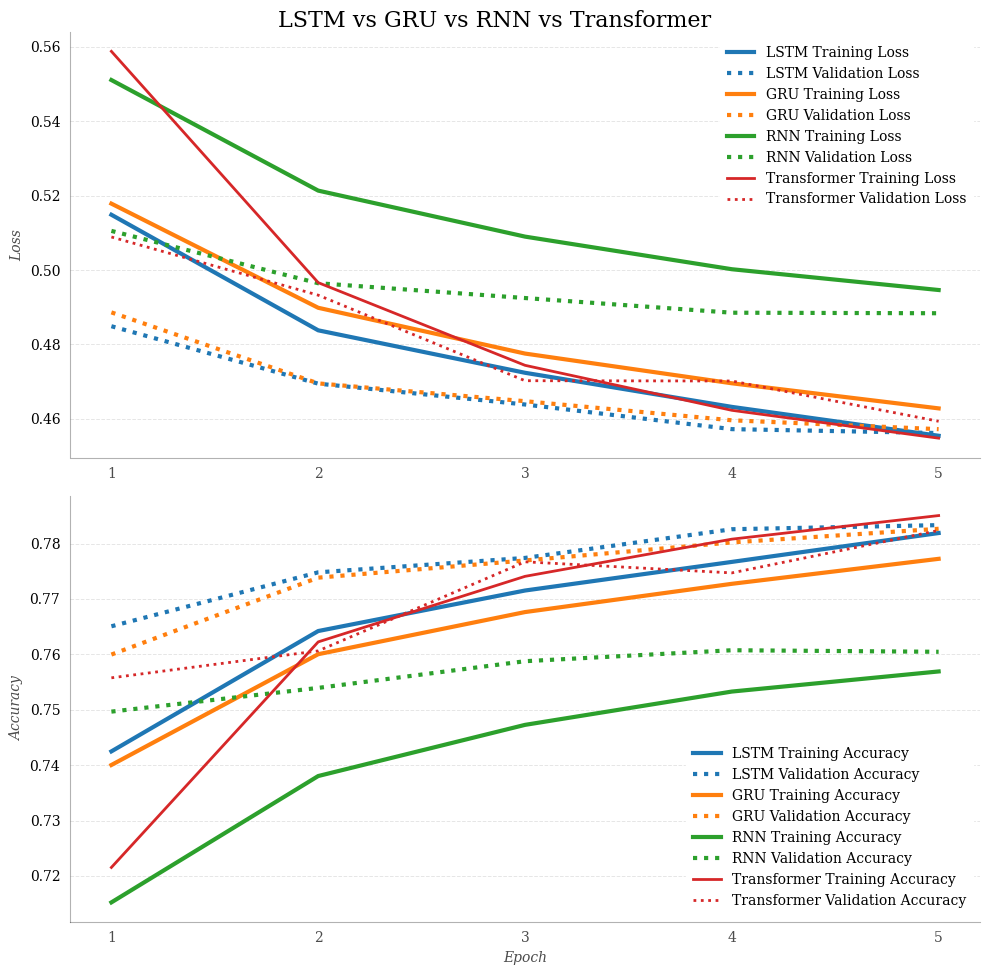

In [52]:
plot_loss_accuracy_three_models(history, history_gru, history_rnn, history_transformer, "LSTM vs GRU vs RNN vs Transformer")

In [64]:
import pickle

class History_trained_model:
    def __init__(self, his):
        self.history = history.history
        self.epoch = history.epoch
        self.params = history.params


for his, name in zip([history, history_gru, history_rnn, history_transformer],
                     ["history_lstm", "history_gru", "history_rnn", "history_transformer"]):
    with open(f"data/{name}.pickle", 'wb') as f:
        model_history = History_trained_model(his)
        pickle.dump(model_history, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
## load history
# with open(f"data/history_lstm.pickle", 'wb') as f:
#     history=pickle.load(f)
# with open(f"data/history_gru.pickle", 'wb') as f:
#     history_gru=pickle.load(f)
# with open(f"data/history_rnn.pickle", 'wb') as f:
#     history_rnn=pickle.load(f)
# with open(f"data/history_transformer.pickle", 'wb') as f:
#     history_transformer=pickle.load(f)

# load trained model

In [72]:
import numpy as np
import pandas as pd
from keras.models import load_model
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def calculate_metrics(test, pred):
    accuracy = accuracy_score(test, pred)
    recall = recall_score(test, pred, average='macro')
    precision = precision_score(test, pred, average='macro')
    f1 = f1_score(test, pred, average='macro')
    return accuracy, precision, recall, f1

In [ ]:
# from keras.models import load_model
# lstm_model = load_model('../datasets/lstm_model.keras', compile=True)
# rnn_model = load_model('../datasets/rnn_model.keras', compile=True)
# gru_model = load_model('../datasets/gru_model.keras', compile=True)
# transformer_model = load_model('../datasets/transformer_model.keras', compile=True)

In [ ]:
models = {
    "LSTM": lstm_model,
    "RNN": rnn_model,
    "GRU": gru_model,
    "Transformer": transformer_model
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred < 0.5, 0, 1)
    accuracy, precision, recall, f1 = calculate_metrics(y_test.ravel(), y_pred.ravel())
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1
    })

results_df = pd.DataFrame(results)

In [74]:
results_df

,Model,Accuracy,Precision,Recall,F1
0,LSTM,0.77876,0.779985,0.778828,0.778546
1,RNN,0.76042,0.765297,0.760278,0.759246
2,GRU,0.78030,0.780520,0.780328,0.780268
3,Transformer,0.78206,0.782253,0.782032,0.782011


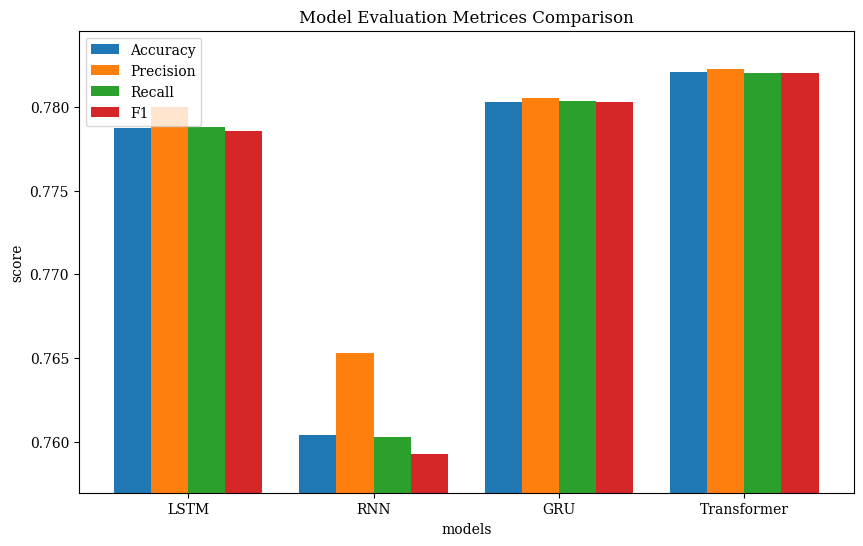

In [78]:
import matplotlib.pyplot as plt
import numpy as np

models = results_df["Model"]
metrics = ["Accuracy", "Precision", "Recall", "F1"]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, results_df[metric], width, label=metric)

ax.set_xlabel("models")
ax.set_ylabel("score")
ax.set_title("Model Evaluation Metrices Comparison")
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models)
ax.legend()

y_min = results_df[metrics].min().min()
y_max = results_df[metrics].max().max()
margin = (y_max - y_min) * 0.1
ax.set_ylim(y_min - margin, y_max + margin)

plt.show()

## BTC twitters analysis

In [ ]:
# from keras.models import load_model

# # Load previously trained LTSM model
# lstm_model = load_model('data/lstm_model.keras', compile = True)

In [79]:
path = 'data/scraped_twitter.csv'

# Load dataset of scraped tweets
with open(path, 'r', encoding='utf-8') as f:
    tweets_df = pd.read_csv(f, index_col=0)

tweets_df.head(len(tweets_df))

,mdy,date,content,likes,retweets
0,2023-03-06,2023-03-06 23:58:49+00:00,girl explain bitcoin,501,140
1,2023-03-06,2023-03-06 23:58:07+00:00,roughly hour leave pulsechain testnet fully sy...,32,1
2,2023-03-06,2023-03-06 23:57:47+00:00,come join conversation bitcoin fix hood americ...,24,1
3,2023-03-06,2023-03-06 23:54:57+00:00,get haircut pay bitcoin feel good always offer...,14,0
4,2023-03-06,2023-03-06 23:54:52+00:00,bitcoin usd weekly wrong bearish rising wedge ...,721,65
...,...,...,...,...,...
354888,2022-03-07,2022-03-07 07:25:09+00:00,gold act exactly store value preserve wealth c...,264,28
354889,2022-03-07,2022-03-07 07:24:10+00:00,see selloff tym bitcoin hold ema wts go happen...,27,1
354890,2022-03-07,2022-03-07 07:23:30+00:00,many follower bitcoin bitcoin,30,16
354891,2022-03-07,2022-03-07 07:17:32+00:00,reserve risk useful opinion underused indicato...,112,22


In [80]:
# Pad text content of dataset
X_test = pad_sequences(tokeniser.texts_to_sequences(tweets_df['content']), maxlen=max_len)

In [81]:
# Predict sentiment polarity of tweets
y_pred = lstm_model.predict(X_test)

11091/11091 [==============================] - 170s 15ms/step


In [82]:
# Convert probability prediction from sigmoid function to binary prediction
for i, pred in enumerate(y_pred):
    y_pred[i] = 0 if pred[0] < 0.5 else 1

In [83]:
# Flatten sentiment polarity prediction dataset
tweets_df['Sentiment'] = y_pred.reshape(-1)

In [84]:
tweets_df.head(len(tweets_df))

,mdy,date,content,likes,retweets,Sentiment
0,2023-03-06,2023-03-06 23:58:49+00:00,girl explain bitcoin,501,140,1.0
1,2023-03-06,2023-03-06 23:58:07+00:00,roughly hour leave pulsechain testnet fully sy...,32,1,0.0
2,2023-03-06,2023-03-06 23:57:47+00:00,come join conversation bitcoin fix hood americ...,24,1,1.0
3,2023-03-06,2023-03-06 23:54:57+00:00,get haircut pay bitcoin feel good always offer...,14,0,1.0
4,2023-03-06,2023-03-06 23:54:52+00:00,bitcoin usd weekly wrong bearish rising wedge ...,721,65,0.0
...,...,...,...,...,...,...
354888,2022-03-07,2022-03-07 07:25:09+00:00,gold act exactly store value preserve wealth c...,264,28,0.0
354889,2022-03-07,2022-03-07 07:24:10+00:00,see selloff tym bitcoin hold ema wts go happen...,27,1,0.0
354890,2022-03-07,2022-03-07 07:23:30+00:00,many follower bitcoin bitcoin,30,16,0.0
354891,2022-03-07,2022-03-07 07:17:32+00:00,reserve risk useful opinion underused indicato...,112,22,1.0


In [85]:
# Save dataset of tweets labeled with their sentiment polarity
path = 'data/btcTweetWithSentiment.csv'

with open(path, 'w', encoding='utf-8') as f:
    tweets_df.to_csv(f)

In [86]:
tweets_df['mdy'] = pd.to_datetime(tweets_df['mdy'])

In [87]:
daily_average = tweets_df.groupby(tweets_df['mdy'].dt.date)['Sentiment'].mean().reset_index()

In [88]:
daily_average.head(len(daily_average))

,mdy,Sentiment
0,2022-03-07,0.494
1,2022-03-08,0.512
2,2022-03-09,0.573
3,2022-03-10,0.514
4,2022-03-11,0.541
...,...,...
358,2023-03-02,0.572
359,2023-03-03,0.570
360,2023-03-04,0.611
361,2023-03-05,0.599


In [90]:
path = 'data/avgDailySentiment.csv'
with open(path, 'w', encoding='utf-8') as f:
    daily_average.to_csv(f)

# Visualization

In [91]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Avg weekly sentiment

In [92]:
weekly_rtrn = 'data/BTC_data_weeklyrtrn.csv'

with open(weekly_rtrn, 'r', encoding='utf-8') as f:
    weekly_rtrn = pd.read_csv(f)

weekly_rtrn.rename(columns={'Date': 'date'}, inplace=True)
weekly_rtrn['date'] = pd.to_datetime(weekly_rtrn['date'])
weekly_rtrn.set_index('date', inplace=True)
weekly_rtrn.drop(weekly_rtrn.columns[[0, 1]], axis=1, inplace=True)
weekly_rtrn['weekly_return'] = weekly_rtrn['weekly_return'] * 100
weekly_rtrn.head()

,weekly_return
date,
2022-03-13,NaN
2022-03-20,8.978046
2022-03-27,13.510211
2022-04-03,-0.783686
2022-04-10,-9.140083


In [93]:
weekly_sent = 'data/avgWeeklySentiment.csv'

with open(weekly_sent, 'r', encoding='utf-8') as f:
    weekly_sent = pd.read_csv(f)

weekly_sent.rename(columns={'mdy': 'date', 'Sentiment': 'Contextual Score'}, inplace=True)
weekly_sent['date'] = pd.to_datetime(weekly_sent['date'])
weekly_sent.set_index('date', inplace=True)
weekly_sent.drop(weekly_sent.columns[0], axis=1, inplace=True)
weekly_sent['Contextual Score'] = weekly_sent['Contextual Score'] * 100

weekly_sent.head(len(weekly_sent))

,Contextual Score
date,
2022-03-13,53.527875
2022-03-20,56.229200
2022-03-27,56.055811
2022-04-03,58.114286
2022-04-10,58.400000
2022-04-17,57.828571
2022-04-24,57.971429
2022-05-01,56.757143
2022-05-08,54.157143


In [98]:
vis_df = pd.merge(weekly_rtrn, weekly_sent, left_index=True, right_index=True)
vis_df.dropna(inplace=True)
vis_df.head()

,weekly_return,Contextual Score
date,,
2022-03-20,8.978046,52.857143
2022-03-27,13.510211,47.142857
2022-04-03,-0.783686,45.714286
2022-04-10,-9.140083,52.857143
2022-04-17,-5.901104,55.714286


In [99]:
corr_same_week = vis_df['weekly_return'].corr(vis_df['Contextual Score'])
corr_lag1week = vis_df['weekly_return'].corr(vis_df['Contextual Score'].shift(-1))
corr_same_week, corr_lag1week

(0.2602191523174627, 0.19798996287695464)

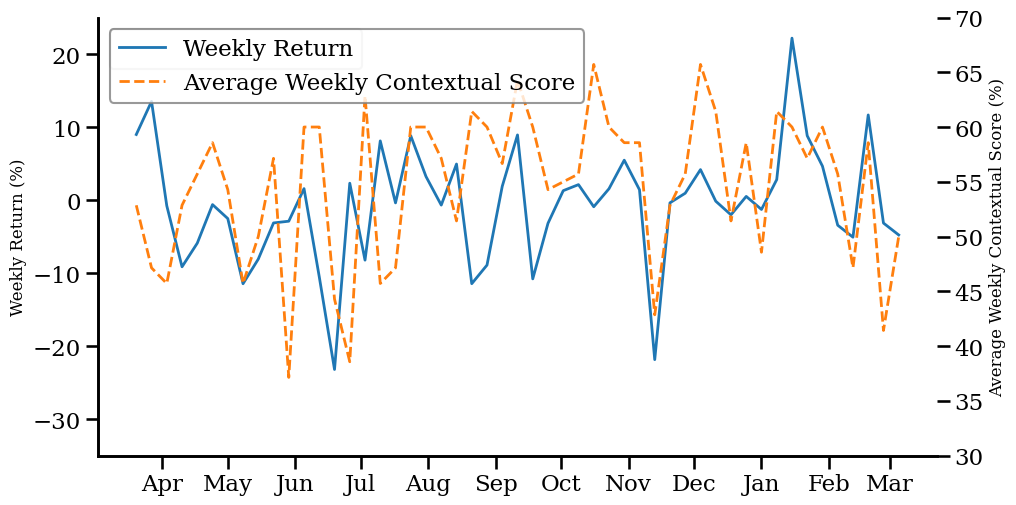

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

sns.set_style({'font.family': 'serif', 'font.serif': 'Times New Roman'})
sns.set_context("talk")
sns.set_palette("muted")

fig, ax = plt.subplots(figsize=(10.5, 5.4))

sns.lineplot(
    data=vis_df,
    x=vis_df.index,
    y='weekly_return',
    color='tab:blue',
    label='Weekly Return',
    linewidth=2,
    ax=ax
)

ax.set_ylim(-35, 25)
ax.set_ylabel("Weekly Return (%)", fontsize=12)
ax.set_xlabel("")


ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


ax2 = ax.twinx()


sns.lineplot(
    data=vis_df,
    x=vis_df.index,
    y='Contextual Score',
    color='tab:orange', 
    linestyle='--',
    label='Average Weekly Contextual Score',
    linewidth=2,
    ax=ax2
)

ax2.set_ylim(30, 70)
ax2.set_ylabel("Average Weekly Contextual Score (%)", fontsize=12)

sns.despine(ax=ax, right=True, top=True)
sns.despine(ax=ax2, right=True, top=True)

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc='upper left',
    frameon=True,
    edgecolor='gray'
)

plt.tight_layout()
plt.show()


In [101]:
daily_rtrn = 'data/BTC_data_dailyrtrn.csv'

with open(daily_rtrn, 'r', encoding='utf-8') as f:
    daily_rtrn = pd.read_csv(f)

daily_rtrn.rename(columns={'Date': 'date', 'Daily Return': 'daily_return'}, inplace=True)
daily_rtrn.dropna(inplace=True)
daily_rtrn['date'] = pd.to_datetime(daily_rtrn['date'])

daily_rtrn.set_index('date', inplace=True)
daily_rtrn.drop(daily_rtrn.columns[[0]], axis=1, inplace=True)

# daily_rtrn['daily_return'] = daily_rtrn['daily_return'] * 100
daily_rtrn['daily_return'] = daily_rtrn['daily_return'].astype(float)
daily_rtrn['daily_return'] = daily_rtrn['daily_return'].apply(lambda x: round(x, 4))

daily_rtrn.head(len(daily_rtrn))

,daily_return
date,
2022-03-07,-0.9557
2022-03-08,1.7797
2022-03-09,8.3631
2022-03-10,-6.0433
2022-03-11,-1.6354
...,...
2023-03-01,2.1408
2023-03-02,-0.7255
2023-03-03,-4.7449


In [110]:
daily_sent = 'data/avgDailySentiment.csv'

with open(daily_sent, 'r', encoding='utf-8') as f:
    daily_sent = pd.read_csv(f)

daily_sent.rename(columns={'mdy': 'date', 'Sentiment': 'Contextual Score'}, inplace=True)
daily_sent['date'] = pd.to_datetime(daily_sent['date'])
daily_sent.set_index('date', inplace=True)
daily_sent.drop(daily_sent.columns[0], axis=1, inplace=True)
daily_sent['Contextual Score'] = daily_sent['Contextual Score'] * 100

daily_sent.head(len(daily_sent))

,Contextual Score
date,
2022-03-07,49.4
2022-03-08,51.2
2022-03-09,57.3
2022-03-10,51.4
2022-03-11,54.1
...,...
2023-03-02,57.2
2023-03-03,57.0
2023-03-04,61.1


In [111]:
daily_rtrn

,daily_return
date,
2022-03-07,-0.9557
2022-03-08,1.7797
2022-03-09,8.3631
2022-03-10,-6.0433
2022-03-11,-1.6354
...,...
2023-03-01,2.1408
2023-03-02,-0.7255
2023-03-03,-4.7449


In [112]:
vis_df = pd.merge(daily_rtrn, daily_sent, left_index=True, right_index=True)
vis_df.dropna(inplace=True)
vis_df.head()

,daily_return,Contextual Score
date,,
2022-03-07,-0.9557,49.4
2022-03-08,1.7797,51.2
2022-03-09,8.3631,57.3
2022-03-10,-6.0433,51.4
2022-03-11,-1.6354,54.1


In [105]:
corr_same_day = vis_df['daily_return'].corr(vis_df['sentiment'])
corr_lag1day = vis_df['daily_return'].corr(vis_df['sentiment'].shift(-1))
corr_same_day, corr_lag1day

(0.24833370461950757, 0.1648090412545581)

In [109]:
corr_list = [
    [corr_same_day, corr_same_week],
    [corr_lag1day, corr_lag1week]
]
df_2x2 = pd.DataFrame(corr_list,
                      index=['same', 'lag1'],
                      columns=['day', 'week'])

df_2x2

,day,week
same,0.248334,0.260219
lag1,0.164809,0.197990


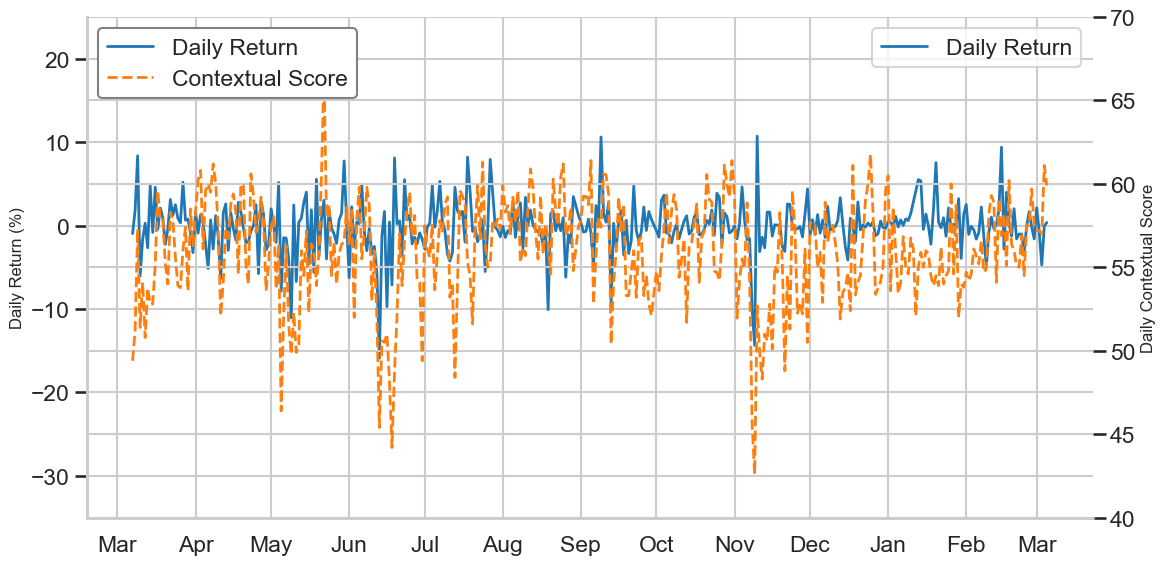

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("muted")

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=vis_df,
    x=vis_df.index,
    y='daily_return',
    color='tab:blue',
    label='Daily Return',
    linewidth=2,
    ax=ax
)

ax.set_ylim(-35, 25)
ax.set_ylabel("Daily Return (%)", fontsize=12)
ax.set_xlabel("")  # 不需要 X 轴名称时可置空

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax2 = ax.twinx()

sns.lineplot(
    data=vis_df,
    x=vis_df.index,
    y='sentiment',
    color='tab:orange',
    linestyle='--',
    label='Contextual Score',
    linewidth=2,
    ax=ax2
)

ax2.set_ylim(40, 70)
ax2.set_ylabel("Daily Contextual Score", fontsize=12)

sns.despine(right=True, top=True, ax=ax)
sns.despine(right=True, top=True, ax=ax2)

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc='upper left',
    frameon=True,
    framealpha=1,
    edgecolor='gray'
)

plt.tight_layout()
plt.show()

# sentiment feature integration

In [115]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import matplotlib.pyplot as plt
import esig as ts
from IPython import display
from xgboost import XGBRegressor

In [116]:
df = df_bak

In [117]:
df.iloc[2]

Open            3.874282e+04
High            4.246567e+04
Low             3.870609e+04
Close           4.198293e+04
Volume          3.228412e+10
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2022-03-09 00:00:00+00:00, dtype: float64

In [118]:
df_bak_reset = df.reset_index()

# Rename the new column (which used to be the index) to 'Date'
df_bak_reset = df_bak_reset.rename(columns={'index': 'Date'})

In [119]:
df_bak_reset

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-03-07 00:00:00+00:00,38429.304688,39430.226562,37260.203125,38062.039062,28546143503,0.0,0.0
1,2022-03-08 00:00:00+00:00,38059.902344,39304.441406,37957.386719,38737.269531,25776583476,0.0,0.0
2,2022-03-09 00:00:00+00:00,38742.816406,42465.671875,38706.093750,41982.925781,32284121034,0.0,0.0
3,2022-03-10 00:00:00+00:00,41974.070312,42004.726562,38832.941406,39437.460938,31078064711,0.0,0.0
4,2022-03-11 00:00:00+00:00,39439.968750,40081.679688,38347.433594,38794.972656,26364890465,0.0,0.0
...,...,...,...,...,...,...,...,...
359,2023-03-01 00:00:00+00:00,23150.929688,23880.632812,23088.626953,23646.550781,24662841200,0.0,0.0
360,2023-03-02 00:00:00+00:00,23647.019531,23739.138672,23245.021484,23475.466797,20386398516,0.0,0.0
361,2023-03-03 00:00:00+00:00,23476.632812,23479.347656,22213.238281,22362.679688,26062404610,0.0,0.0
362,2023-03-04 00:00:00+00:00,22362.923828,22405.177734,22198.980469,22353.349609,11166012913,0.0,0.0


In [120]:
# Converting the 'Date' column to datetime
df_bak_reset['Date'] = pd.to_datetime(df_bak_reset['Date'])

# Convert to the desired format
df_transformed = pd.DataFrame({
    'unix': df_bak_reset['Date'].astype('int64') // 10 ** 9,  # Convert to Unix timestamp (seconds)
    'date': df_bak_reset['Date'].dt.strftime('%Y-%m-%d %H:%M:%S'),  # Convert to string format
    'symbol': 'BTC/USD',  # Set symbol as BTC/USD
    'open': df_bak_reset['Open'],
    'high': df_bak_reset['High'],
    'low': df_bak_reset['Low'],
    'close': df_bak_reset['Close'],
    'Volume BTC': df_bak_reset['Volume'] / 1e8,  # Convert volume to BTC (example conversion)
    'Volume USD': df_bak_reset['Volume'] * df_bak_reset['Close'] / 1e8  # Convert volume to USD (example conversion)
})


In [121]:
df_transformed

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646611200,2022-03-07 00:00:00,BTC/USD,38429.304688,39430.226562,37260.203125,38062.039062,285.461435,1.086524e+07
1,1646697600,2022-03-08 00:00:00,BTC/USD,38059.902344,39304.441406,37957.386719,38737.269531,257.765835,9.985145e+06
2,1646784000,2022-03-09 00:00:00,BTC/USD,38742.816406,42465.671875,38706.093750,41982.925781,322.841210,1.355382e+07
3,1646870400,2022-03-10 00:00:00,BTC/USD,41974.070312,42004.726562,38832.941406,39437.460938,310.780647,1.225640e+07
4,1646956800,2022-03-11 00:00:00,BTC/USD,39439.968750,40081.679688,38347.433594,38794.972656,263.648905,1.022825e+07
...,...,...,...,...,...,...,...,...,...
359,1677628800,2023-03-01 00:00:00,BTC/USD,23150.929688,23880.632812,23088.626953,23646.550781,246.628412,5.831911e+06
360,1677715200,2023-03-02 00:00:00,BTC/USD,23647.019531,23739.138672,23245.021484,23475.466797,203.863985,4.785802e+06
361,1677801600,2023-03-03 00:00:00,BTC/USD,23476.632812,23479.347656,22213.238281,22362.679688,260.624046,5.828252e+06
362,1677888000,2023-03-04 00:00:00,BTC/USD,22362.923828,22405.177734,22198.980469,22353.349609,111.660129,2.495978e+06


In [122]:
# Save dataset of tweets labeled with their sentiment polarity
path = 'data/avgDailySentiment.csv'

with open(path, 'r', encoding='utf-8') as f:
    sent_df = pd.read_csv(f)

In [123]:
sent_df

,Unnamed: 0,mdy,Sentiment
0,0,2022-03-07,0.494
1,1,2022-03-08,0.512
2,2,2022-03-09,0.573
3,3,2022-03-10,0.514
4,4,2022-03-11,0.541
...,...,...,...
358,358,2023-03-02,0.572
359,359,2023-03-03,0.570
360,360,2023-03-04,0.611
361,361,2023-03-05,0.599


In [124]:
sent_df = sent_df.drop(columns=["Unnamed: 0"])
sent_df['mdy'] = pd.to_datetime(sent_df['mdy'])
df_transformed['date'] = pd.to_datetime(df_transformed['date'])
sent_df['date'] = sent_df['mdy'].dt.date
df_transformed['date'] = df_transformed['date'].dt.date
merged_df = pd.merge(sent_df, df_transformed, on='date', how='inner')
merged_df.set_index('date', inplace=True)
merged_df

,mdy,Sentiment,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,,,
2022-03-07,2022-03-07,0.494,1646611200,BTC/USD,38429.304688,39430.226562,37260.203125,38062.039062,285.461435,1.086524e+07
2022-03-08,2022-03-08,0.512,1646697600,BTC/USD,38059.902344,39304.441406,37957.386719,38737.269531,257.765835,9.985145e+06
2022-03-09,2022-03-09,0.573,1646784000,BTC/USD,38742.816406,42465.671875,38706.093750,41982.925781,322.841210,1.355382e+07
2022-03-10,2022-03-10,0.514,1646870400,BTC/USD,41974.070312,42004.726562,38832.941406,39437.460938,310.780647,1.225640e+07
2022-03-11,2022-03-11,0.541,1646956800,BTC/USD,39439.968750,40081.679688,38347.433594,38794.972656,263.648905,1.022825e+07
...,...,...,...,...,...,...,...,...,...,...
2023-03-01,2023-03-01,0.572,1677628800,BTC/USD,23150.929688,23880.632812,23088.626953,23646.550781,246.628412,5.831911e+06
2023-03-02,2023-03-02,0.572,1677715200,BTC/USD,23647.019531,23739.138672,23245.021484,23475.466797,203.863985,4.785802e+06
2023-03-03,2023-03-03,0.570,1677801600,BTC/USD,23476.632812,23479.347656,22213.238281,22362.679688,260.624046,5.828252e+06


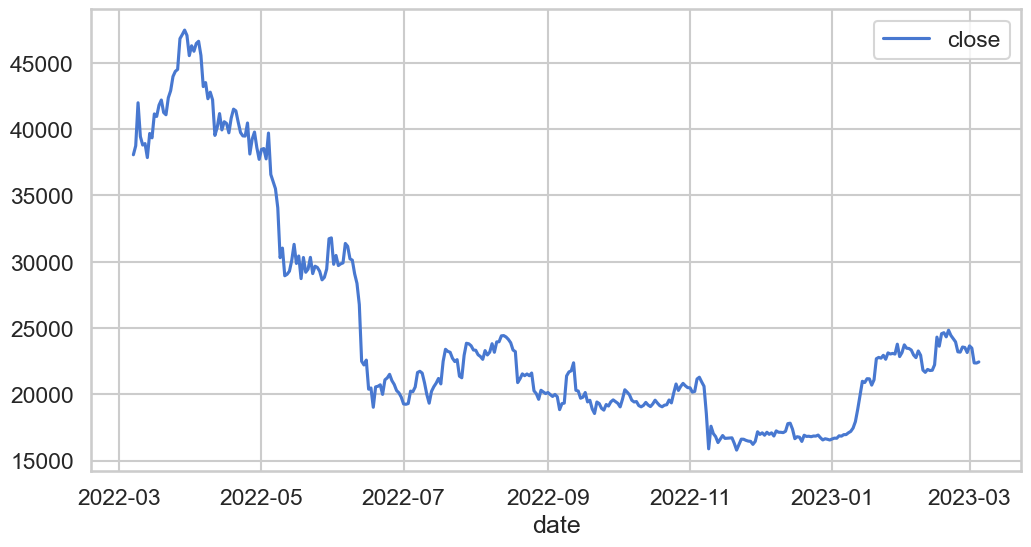

In [125]:
ax = merged_df.plot(y='close', figsize=(12, 6), legend=True, grid=True, use_index=True)
plt.show()

In [126]:
merged_df.index = pd.to_datetime(merged_df.index)

In [127]:
merged_df.index

DatetimeIndex(['2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10',
               '2022-03-11', '2022-03-12', '2022-03-13', '2022-03-14',
               '2022-03-15', '2022-03-16',
               ...
               '2023-02-24', '2023-02-25', '2023-02-26', '2023-02-27',
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-04', '2023-03-05'],
              dtype='datetime64[ns]', name='date', length=362, freq=None)

In [128]:
start_date = '2022-03-07'
final_date = '2023-03-05'
df_interval = merged_df[start_date:final_date]

In [129]:
df_interval['close'].head(10)

date
2022-03-07    38062.039062
2022-03-08    38737.269531
2022-03-09    41982.925781
2022-03-10    39437.460938
2022-03-11    38794.972656
2022-03-12    38904.011719
2022-03-13    37849.664062
2022-03-14    39666.753906
2022-03-15    39338.785156
2022-03-16    41143.929688
Name: close, dtype: float64

In [130]:
def get_window(x, h_window=30, f_window=10):
    X = np.array(x.iloc[:h_window, ]).reshape(1, -1)
    for i in range(1, len(x) - h_window + 1):
        x_i = np.array(x.iloc[i:i + h_window, ]).reshape(1, -1)
        X = np.append(X, x_i, axis=0)
    rolling_window = X[:-f_window, ]
    return rolling_window

In [131]:
def get_next_mean(x, h_window=30, f_window=10):
    next_mean = x.rolling(f_window).mean().iloc[h_window + f_window - 1:, ]
    return next_mean

In [132]:
rolling_window = get_window(df_interval.loc[:, 'close'].head(10), h_window=5, f_window=2)
pd.DataFrame(rolling_window).head()

,0,1,2,3,4
0,38062.039062,38737.269531,41982.925781,39437.460938,38794.972656
1,38737.269531,41982.925781,39437.460938,38794.972656,38904.011719
2,41982.925781,39437.460938,38794.972656,38904.011719,37849.664062
3,39437.460938,38794.972656,38904.011719,37849.664062,39666.753906


In [134]:
rolling_window = get_window(df_interval.loc[:, 'close'].head(10), h_window=5, f_window=2)
pd.DataFrame(rolling_window).head()

,0,1,2,3,4
0,38062.039062,38737.269531,41982.925781,39437.460938,38794.972656
1,38737.269531,41982.925781,39437.460938,38794.972656,38904.011719
2,41982.925781,39437.460938,38794.972656,38904.011719,37849.664062
3,39437.460938,38794.972656,38904.011719,37849.664062,39666.753906


In [135]:
def add_time(x):
    t = np.linspace(0, 1, len(x))
    return np.c_[t, x]

In [136]:
def calc_lead(x):
    lead_arr = np.delete(np.repeat(x[:, 0], 2), 0).reshape(-1, 1)
    for j in range(1, x.shape[1]):
        x_j = x[:, j]
        x_j_lead = np.delete(np.repeat(x_j, 2), 0).reshape(-1, 1)
        lead_arr = np.concatenate((lead_arr, x_j_lead), axis=1)
    return lead_arr

In [137]:
def calc_lag(x):
    lag_arr = np.delete(np.repeat(x[:, 0], 2), -1).reshape(-1, 1)
    for j in range(1, x.shape[1]):
        x_j = x[:, j]
        x_j_lag = np.delete(np.repeat(x_j, 2), -1).reshape(-1, 1)
        lag_arr = np.concatenate((lag_arr, x_j_lag), axis=1)
    return lag_arr

In [138]:
close_price = df_interval.loc[:, 'close']
h_window = 30
f_window = 10
sig_level = 2

In [139]:
y = get_next_mean(close_price, h_window=h_window, f_window=f_window)

In [141]:
close_price_slice = close_price.iloc[0:(len(close_price) - (f_window))]
close_price_array = np.array(close_price_slice).reshape(-1, 1)
lag = calc_lag(close_price_array)
lead = calc_lead(add_time(close_price_array))

stream = np.concatenate((lead, lag), axis=1)
X_sig = [ts.stream2sig(stream[0:2 * h_window - 1], sig_level)]

for i in range(1, (len(close_price) - (f_window) - (h_window) + 1)):
    stream_i = stream[2 * i: 2 * (i + h_window) - 1]
    signature_i = [ts.stream2sig(stream_i, sig_level)]
    X_sig = np.append(X_sig, signature_i, axis=0)

In [142]:
pd.DataFrame(X_sig).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.082621,7493.953125,7493.953125,0.003413,224.744491,235.419638,394.414029,2.807967e+07,4.860337e+07,383.738882,7.555965e+06,2.807967e+07
1,1.0,0.082621,4469.468750,4469.468750,0.003413,13.604679,19.971443,355.667668,9.988075e+06,3.304331e+07,349.300904,-1.306716e+07,9.988075e+06
2,1.0,0.082621,1520.921875,1520.921875,0.003413,29.618857,31.785412,96.041355,1.156602e+06,1.898883e+07,93.874800,-1.667562e+07,1.156602e+06
3,1.0,0.082621,2850.203125,2850.203125,0.003413,-77.090222,-73.030104,312.577090,4.061829e+06,1.939391e+07,308.516972,-1.127025e+07,4.061829e+06
4,1.0,0.082621,3987.164062,3987.164062,0.003413,-45.976195,-40.296474,375.400007,7.948739e+06,2.319668e+07,369.720286,-7.299198e+06,7.948739e+06


In [143]:
pd.DataFrame(y).head()

,close
date,
2022-04-15,41529.285547
2022-04-16,41251.060156
2022-04-17,40872.370703
2022-04-18,40726.225781
2022-04-19,40598.287109


In [144]:
X_window = add_time(get_window(close_price, h_window=h_window, f_window=f_window))
pd.DataFrame(X_window).head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.000000,38062.039062,38737.269531,41982.925781,39437.460938,38794.972656,38904.011719,37849.664062,39666.753906,39338.785156,...,46820.492188,47128.003906,47465.730469,47062.664062,45538.675781,46281.644531,45868.949219,46453.566406,46622.675781,45555.992188
1,0.003106,38737.269531,41982.925781,39437.460938,38794.972656,38904.011719,37849.664062,39666.753906,39338.785156,41143.929688,...,47128.003906,47465.730469,47062.664062,45538.675781,46281.644531,45868.949219,46453.566406,46622.675781,45555.992188,43206.738281
2,0.006211,41982.925781,39437.460938,38794.972656,38904.011719,37849.664062,39666.753906,39338.785156,41143.929688,40951.378906,...,47465.730469,47062.664062,45538.675781,46281.644531,45868.949219,46453.566406,46622.675781,45555.992188,43206.738281,43503.847656
3,0.009317,39437.460938,38794.972656,38904.011719,37849.664062,39666.753906,39338.785156,41143.929688,40951.378906,41801.156250,...,47062.664062,45538.675781,46281.644531,45868.949219,46453.566406,46622.675781,45555.992188,43206.738281,43503.847656,42287.664062
4,0.012422,38794.972656,38904.011719,37849.664062,39666.753906,39338.785156,41143.929688,40951.378906,41801.156250,42190.652344,...,45538.675781,46281.644531,45868.949219,46453.566406,46622.675781,45555.992188,43206.738281,43503.847656,42287.664062,42782.136719


# Signature

In [145]:
def prepare_data2(data, h_window=30, f_window=10, sig_level=2):
    close_price = data.loc[:, 'close']
    y = get_next_mean(close_price, h_window=h_window, f_window=f_window)
    close_price_slice = close_price.iloc[:len(close_price) - f_window]
    close_price_arr = np.array(close_price_slice).reshape(-1, 1)
    lag_arr = calc_lag(close_price_arr)
    lead_arr = calc_lead(add_time(close_price_arr))

    stream = np.concatenate((lead_arr, lag_arr), axis=1)
    x_sig = [ts.stream2sig(stream[0:2 * h_window - 1], sig_level)] # sig_level can be a larger number

    for i in range(1, len(close_price) - f_window - h_window + 1):
        stream_i = stream[2 * i: 2 * (i + h_window) - 1]
        signature_i = [ts.stream2sig(stream_i, sig_level)]
        x_sig = np.append(x_sig, signature_i, axis=0)
    return x_sig, y

In [146]:
def prepare_data1(data, h_window=30, f_window=10, sig_level=2):
    features = data[['Sentiment', 'close']]
    y = get_next_mean(data['close'], h_window=h_window, f_window=f_window)
    features_slice = features.iloc[:len(features) - f_window]
    features_arr = np.array(features_slice) 
    lag_arr = calc_lag(features_arr)
    lead_arr = calc_lead(add_time(features_arr))
    
    stream = np.concatenate((lead_arr, lag_arr), axis=1)
    x_sig = [ts.stream2sig(stream[0:2 * h_window - 1], sig_level)]
    
    for i in range(1, len(features) - f_window - h_window + 1):
        stream_i = stream[2 * i: 2 * (i + h_window) - 1]
        signature_i = [ts.stream2sig(stream_i, sig_level)]
        x_sig = np.append(x_sig, signature_i, axis=0)
    return x_sig, y

In [147]:
def plot_result_dynamic(y_train, y_test, y_train_predict, y_test_predict, test_len, name):
    plt.figure(figsize=(12, 5))

    y_actual = np.concatenate((y_train.to_numpy(), y_test.to_numpy()), axis=0)
    y_max = max(np.max(y_actual), np.max(y_train_predict), np.max(y_test_predict))
    y_min = min(np.min(y_actual), np.min(y_train_predict), np.min(y_test_predict))

    for i in range(len(y_train_predict) + len(y_test_predict)):
        plt.cla()
        plt.xlim((0, len(y_train_predict) + len(y_test_predict)))
        plt.ylim((y_min, y_max))

        if i < len(y_train_predict):
            plt.plot(range(i + 1), y_train_predict[:i + 1], color='red')
            plt.scatter(i, y_train_predict[i], color='red', s=20)
        else:
            plt.plot(range(len(y_train_predict)), y_train_predict, color='red')
            j = i - len(y_train_predict)
            plt.plot(range(len(y_train_predict), len(y_train_predict) + j + 1),
                     y_test_predict[:j + 1],
                     label='Predicted average price',
                     color='red', linestyle='--')
            plt.scatter(len(y_train_predict) + j, y_test_predict[j], color='red', s=20)

        plt.plot(y_actual[:i + 1], label='Actual average price', color='green')

        plt.axvspan(len(y_train), len(y_train) + len(y_test), alpha=0.3, color='lightgrey')

        plt.grid(True)
        plt.axis('tight')
        plt.legend(loc="best")
        plt.title('Predicting the mean BTC price with {}'.format(name))

        display.clear_output(wait=True)
    #         plt.pause(0.00000001)

    plt.show()

In [148]:
def mean_absolute_percentage_error(y_true, y_pred):  # MAPE
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [149]:
X, y = prepare_data1(df_interval, h_window=30, f_window=10)

In [150]:
X_new, y = prepare_data2(df_interval, h_window=30, f_window=10)

In [151]:
X.shape, X_new.shape

((323, 31), (323, 13))

# Lasso+signature

In [152]:
# Split into train and test sets
test_len = 10
train_len = len(y) - test_len
X_train, X_test = X[:train_len], X[train_len:]
y_train, y_test = y[:train_len], y[train_len:]

In [153]:
param_search = {'alpha': [1e-5, 1e-2, 1e-1, 2e-1, 5e-1, 1]}
lasso = Lasso(max_iter=1000000)
cv = TimeSeriesSplit(n_splits=5)
model = GridSearchCV(estimator=lasso,
                     param_grid=param_search,
                     cv=cv,
                     n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Lasso(max_iter=1000000), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.01, 0.1, 0.2, 0.5, 1]})

In [154]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

error_train = mean_absolute_error(y_train, y_train_predict)
error_test = mean_absolute_error(y_test, y_test_predict)
p_error_train = mean_absolute_percentage_error(np.array(y_train).reshape(-1, 1),
                                               np.array(y_train_predict).reshape(-1, 1))
p_error_test = mean_absolute_percentage_error(np.array(y_test).reshape(-1, 1), np.array(y_test_predict).reshape(-1, 1))

print('mae_train:{0:.3f} = {1:.3f}%\n'.format(error_train, p_error_train))
print('mae_test:{0:.3f} = {1:.3f}%'.format(error_test, p_error_test))

mae_train:2350.960 = 10.027%

mae_test:1509.732 = 6.346%


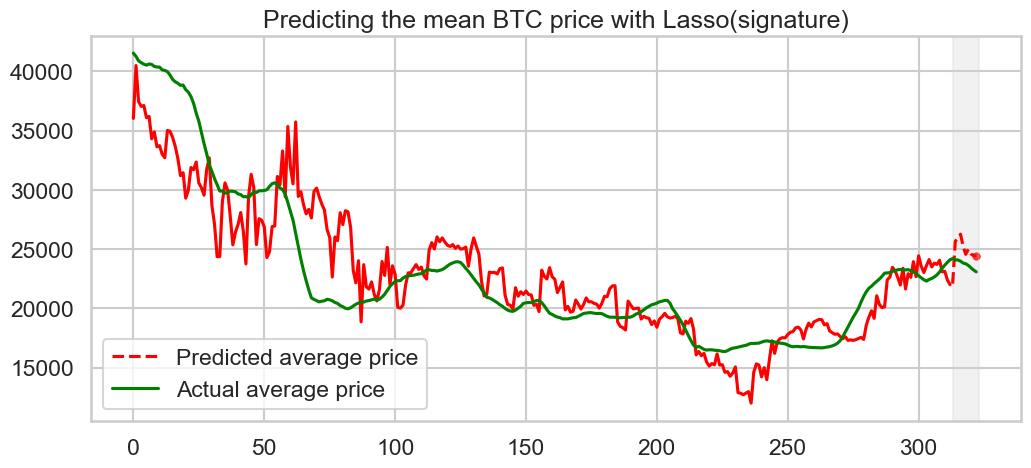

In [155]:
plot_result_dynamic(y_train, y_test, y_train_predict, y_test_predict, test_len, 'Lasso(signature)')

# Lasso+contextual score+signature

In [161]:
# Split into train and test sets
test_len = 10
train_len = len(y) - test_len
X_train, X_test = X_new[:train_len], X_new[train_len:]
y_train, y_test = y[:train_len], y[train_len:]

In [162]:
param_search = {'alpha': [1e-5, 1e-2, 1e-1, 2e-1, 5e-1, 1]}
lasso = Lasso(max_iter=1000000)
cv = TimeSeriesSplit(n_splits=5)
model = GridSearchCV(estimator=lasso,
                     param_grid=param_search,
                     cv=cv,
                     n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Lasso(max_iter=1000000), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.01, 0.1, 0.2, 0.5, 1]})

In [163]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

error_train = mean_absolute_error(y_train, y_train_predict)
error_test = mean_absolute_error(y_test, y_test_predict)
p_error_train = mean_absolute_percentage_error(np.array(y_train).reshape(-1, 1),
                                               np.array(y_train_predict).reshape(-1, 1))
p_error_test = mean_absolute_percentage_error(np.array(y_test).reshape(-1, 1), np.array(y_test_predict).reshape(-1, 1))

print('mae_train:{0:.3f} = {1:.3f}%\n'.format(error_train, p_error_train))
print('mae_test:{0:.3f} = {1:.3f}%'.format(error_test, p_error_test))

mae_train:3027.129 = 12.733%

mae_test:1327.544 = 5.593%


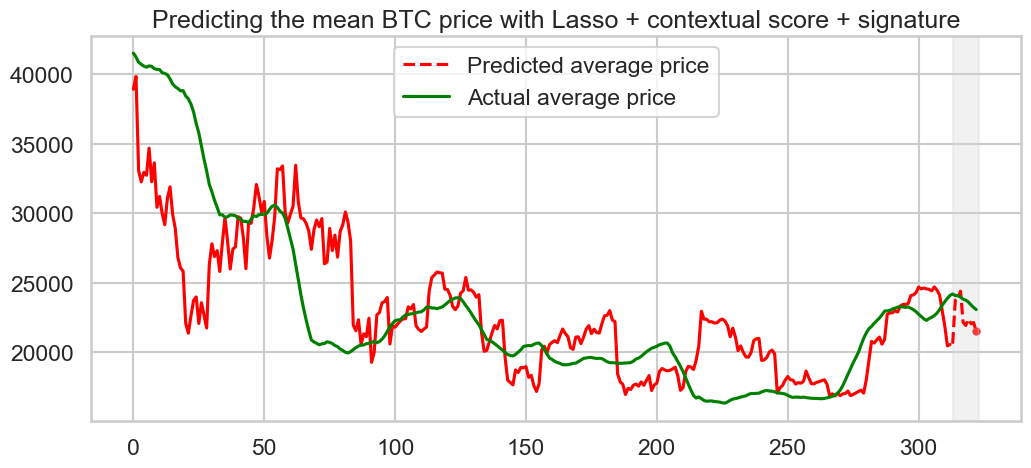

In [164]:
plot_result_dynamic(y_train, y_test, y_train_predict, y_test_predict, test_len, 'Lasso + contextual score + signature')

# XGBoost + signature

In [211]:
X, y = prepare_data1(df_interval, h_window=30, f_window=10)
test_len = 10
train_len = len(y) - test_len
X_train, X_test = X[:train_len], X[train_len:]
y_train, y_test = y[:train_len], y[train_len:]

In [212]:
param_search = {
    'max_depth': [4, 5, 6]
    , 'min_child_weight': [4, 5, 6]
    , 'gamma': [i / 10.0 for i in range(0, 5)]
}

xgb = XGBRegressor(
    learning_rate=0.01,
    n_estimators=500,
    max_depth=4,
    min_child_weight=5,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mae',
    reg_alpha=0.05
)
cv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=xgb,
                     param_grid=param_search,
                     cv=cv,
                     n_jobs=-1)

grid_search.fit(X_train, y_train)
# Best model and parameters
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'gamma': 0.0, 'max_depth': 6, 'min_child_weight': 6}
Best score: -50.8706336301761


In [213]:
y_train_predict = grid_search.predict(X_train)
y_test_predict = grid_search.predict(X_test)

error_train = mean_absolute_error(y_train, y_train_predict)
error_test = mean_absolute_error(y_test, y_test_predict)
p_error_train = mean_absolute_percentage_error(np.array(y_train).reshape(-1, 1),
                                               np.array(y_train_predict).reshape(-1, 1))
p_error_test = mean_absolute_percentage_error(np.array(y_test).reshape(-1, 1), np.array(y_test_predict).reshape(-1, 1))

print('mae_train:{0:.3f} = {1:.3f}%\n'.format(error_train, p_error_train))
print('mae_test:{0:.3f} = {1:.3f}%'.format(error_test, p_error_test))

mae_train:366.889 = 1.598%

mae_test:2298.715 = 9.724%


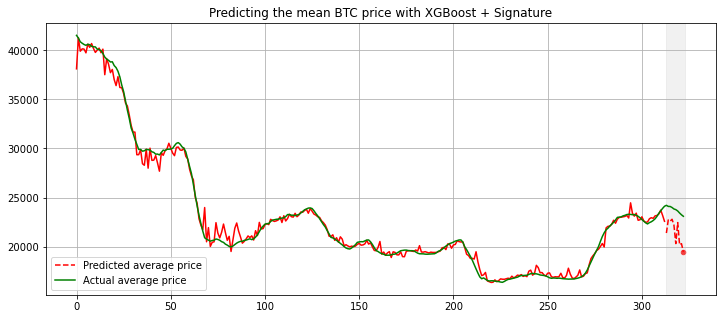

In [214]:
plot_result_dynamic(y_train, y_test, y_train_predict, y_test_predict, test_len, 'XGBoost + Signature')

# XGBoost + contextual score + signature

In [165]:
X_new, y = prepare_data2(df_interval, h_window=30, f_window=10)
test_len = 10
train_len = len(y) - test_len
X_train, X_test = X_new[:train_len], X_new[train_len:]
y_train, y_test = y[:train_len], y[train_len:]

In [166]:
param_search = {
    'max_depth': [4, 5, 6]
    , 'min_child_weight': [4, 5, 6]
    , 'gamma': [i / 10.0 for i in range(0, 5)]
}

xgb = XGBRegressor(
    learning_rate=0.01,
    n_estimators=500,
    max_depth=4,
    min_child_weight=5,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mae',
    reg_alpha=0.05
)
cv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=xgb,
                     param_grid=param_search,
                     cv=cv,
                     n_jobs=-1)

grid_search.fit(X_train, y_train)
# Best model and parameters
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'gamma': 0.0, 'max_depth': 6, 'min_child_weight': 5}
Best score: -29.58186279256612


In [167]:
y_train_predict = grid_search.predict(X_train)
y_test_predict = grid_search.predict(X_test)

error_train = mean_absolute_error(y_train, y_train_predict)
error_test = mean_absolute_error(y_test, y_test_predict)
p_error_train = mean_absolute_percentage_error(np.array(y_train).reshape(-1, 1),
                                               np.array(y_train_predict).reshape(-1, 1))
p_error_test = mean_absolute_percentage_error(np.array(y_test).reshape(-1, 1), np.array(y_test_predict).reshape(-1, 1))

print('mae_train:{0:.3f} = {1:.3f}%\n'.format(error_train, p_error_train))
print('mae_test:{0:.3f} = {1:.3f}%'.format(error_test, p_error_test))

mae_train:708.566 = 3.136%

mae_test:1141.221 = 4.801%


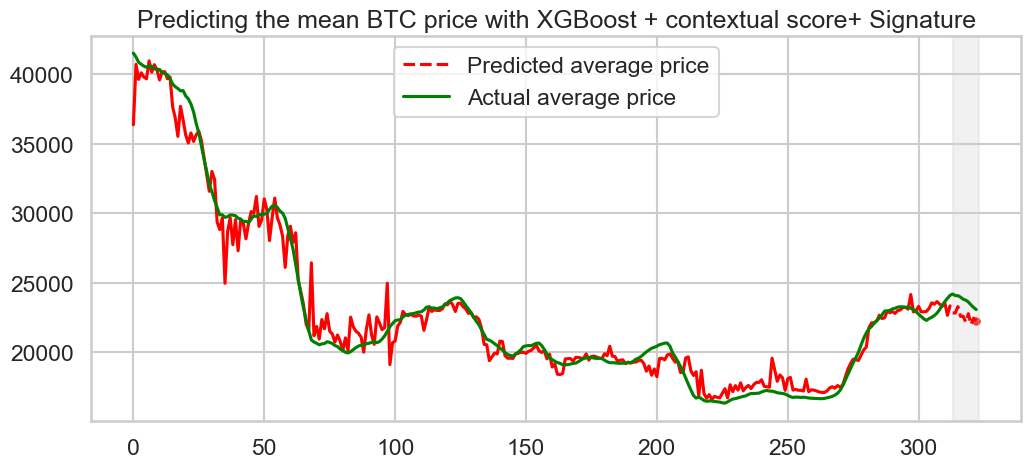

In [168]:
plot_result_dynamic(y_train, y_test, y_train_predict, y_test_predict, test_len, 'XGBoost + contextual score+ Signature')